<a href="https://colab.research.google.com/github/Vaibhav807/Artificial-Intelligence-Projects/blob/main/Autoencoders_Image_Denoising_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Function for adding the noise to each image
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

# Creating the Transform
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    AddGaussianNoise(0., 1.)
])

# Here I am loading the MNIST dataset

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Creating data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 42730503.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 3196782.88it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 12677450.24it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3982133.94it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


In [2]:
# Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28)
        return x

In [3]:
import matplotlib.pyplot as plt

# Initializing lists to store loss values
train_losses = []
val_losses = []

# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# Instantiating the model, criteria and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [4]:
def training(num_epochs):
  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      for images, _ in train_loader:
          noisy_images = images

          outputs = model(noisy_images)
          loss = criterion(outputs, images)

          # Backward pass and optimization step
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          running_loss += loss.item() * images.size(0)

      epoch_loss = running_loss / len(train_loader.dataset)
      train_losses.append(epoch_loss)
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

      # Validation step
      model.eval()
      val_loss = 0.0
      with torch.no_grad():
          for images, _ in test_loader:
              noisy_images = images
              outputs = model(noisy_images)
              loss = criterion(outputs, images)
              val_loss += loss.item() * images.size(0)

      val_loss /= len(test_loader.dataset)
      val_losses.append(val_loss)
      print(f'Validation Loss: {val_loss:.4f}')

  # Plotting the loss values
  plt.figure(figsize=(10, 5))
  plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
  plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()
  plt.show()

In [11]:
# Function to visualize the images
def visualize_results(model, data_loader, num_images=10):
    model.eval()
    with torch.no_grad():
        for images, _ in data_loader:
            noisy_images = images
            outputs = model(noisy_images)
            break

    # Plotting original noisy images and denoised images
    fig, axes = plt.subplots(2, num_images, figsize=(num_images*2, 4))
    for i in range(num_images):

        # Noisy images
        ax = axes[0, i]
        ax.imshow(noisy_images[i].view(28, 28).cpu(), cmap='gray')
        ax.axis('off')

        # Denoised images
        ax = axes[1, i]
        ax.imshow(outputs[i].view(28, 28).cpu(), cmap='gray')
        ax.axis('off')
    plt.show()

In [ ]:
torch.save(model.state_dict(), "output.pt")

In [6]:
model.load_state_dict(torch.load("output.pt"))

<All keys matched successfully>

Epoch [1/40], Loss: 1.5090
Validation Loss: 1.5140
Epoch [2/40], Loss: 1.5088
Validation Loss: 1.5126
Epoch [3/40], Loss: 1.5078
Validation Loss: 1.5124
Epoch [4/40], Loss: 1.5070
Validation Loss: 1.5124
Epoch [5/40], Loss: 1.5078
Validation Loss: 1.5121
Epoch [6/40], Loss: 1.5067
Validation Loss: 1.5122
Epoch [7/40], Loss: 1.5062
Validation Loss: 1.5121
Epoch [8/40], Loss: 1.5062
Validation Loss: 1.5110
Epoch [9/40], Loss: 1.5066
Validation Loss: 1.5123
Epoch [10/40], Loss: 1.5051
Validation Loss: 1.5115
Epoch [11/40], Loss: 1.5056
Validation Loss: 1.5124
Epoch [12/40], Loss: 1.5046
Validation Loss: 1.5094
Epoch [13/40], Loss: 1.5051
Validation Loss: 1.5103
Epoch [14/40], Loss: 1.5048
Validation Loss: 1.5102
Epoch [15/40], Loss: 1.5052
Validation Loss: 1.5096
Epoch [16/40], Loss: 1.5041
Validation Loss: 1.5096
Epoch [17/40], Loss: 1.5047
Validation Loss: 1.5087
Epoch [18/40], Loss: 1.5047
Validation Loss: 1.5092
Epoch [19/40], Loss: 1.5047
Validation Loss: 1.5093
Epoch [20/40], Loss: 

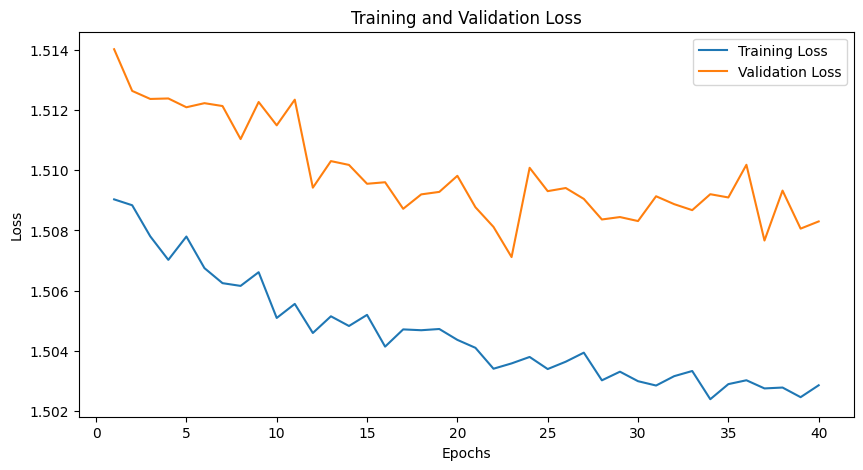

In [7]:
training(40) # Training for 40 epochs

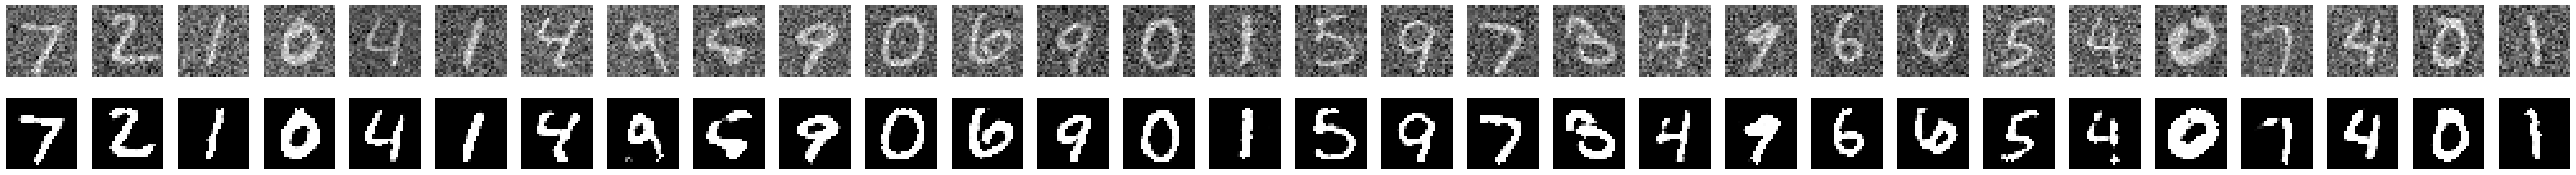

In [14]:
# Visualizing the results on test data
visualize_results(model, test_loader, 30)

In [15]:
torch.save(model.state_dict(), "image_denoising_autoencoder.pt")
model.load_state_dict(torch.load("image_denoising_autoencoder.pt"))

<All keys matched successfully>